# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik

from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA



# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
# Tampilkan 10 baris pertama dengan function head.
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [3]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [4]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

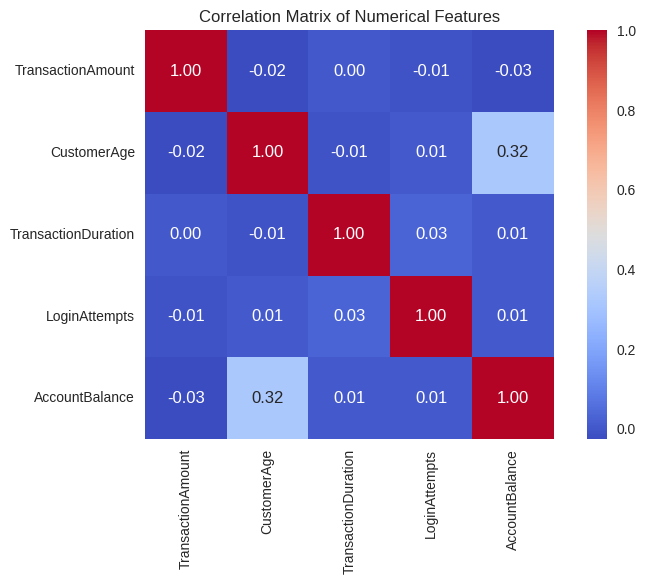

In [5]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Konversi kolom numerik untuk analisis korelasi dan histogram
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Buat korelasi antar fitur numerik
correlation_matrix = df[numeric_cols].corr()

# Plot heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

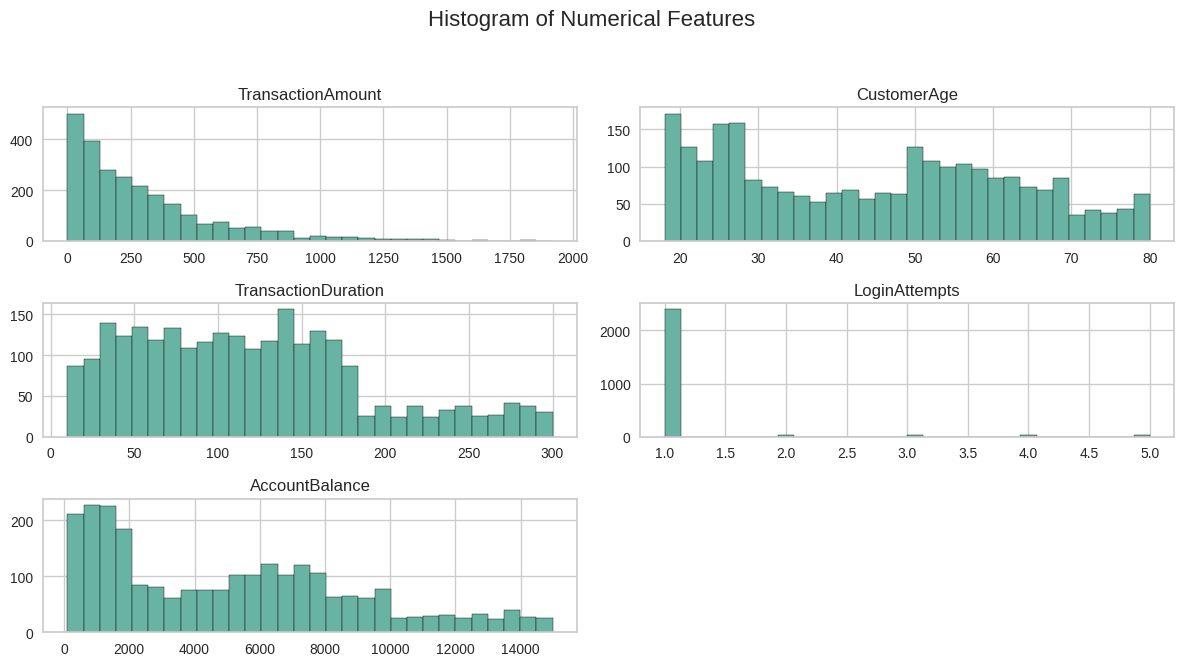

In [6]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
# Plot histogram untuk semua kolom numerik
df[numeric_cols].hist(bins=30, figsize=(12, 7), edgecolor='black', color='#69b3a2')
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

TransactionAmount dan TransactionDuration tampak memiliki distribusi yang miring ke kanan (banyak transaksi kecil).

CustomerAge menunjukkan puncak pada usia tertentu (seperti sekitar usia 20-an dan 60-an).

LoginAttempts tampaknya didominasi oleh angka rendah (seperti 1).

AccountBalance bervariasi, dengan beberapa akun memiliki saldo sangat tinggi.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

<ipython-input-7-2539dca3918d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TransactionType', data=df, ax=axes[1, 1], palette='pastel')


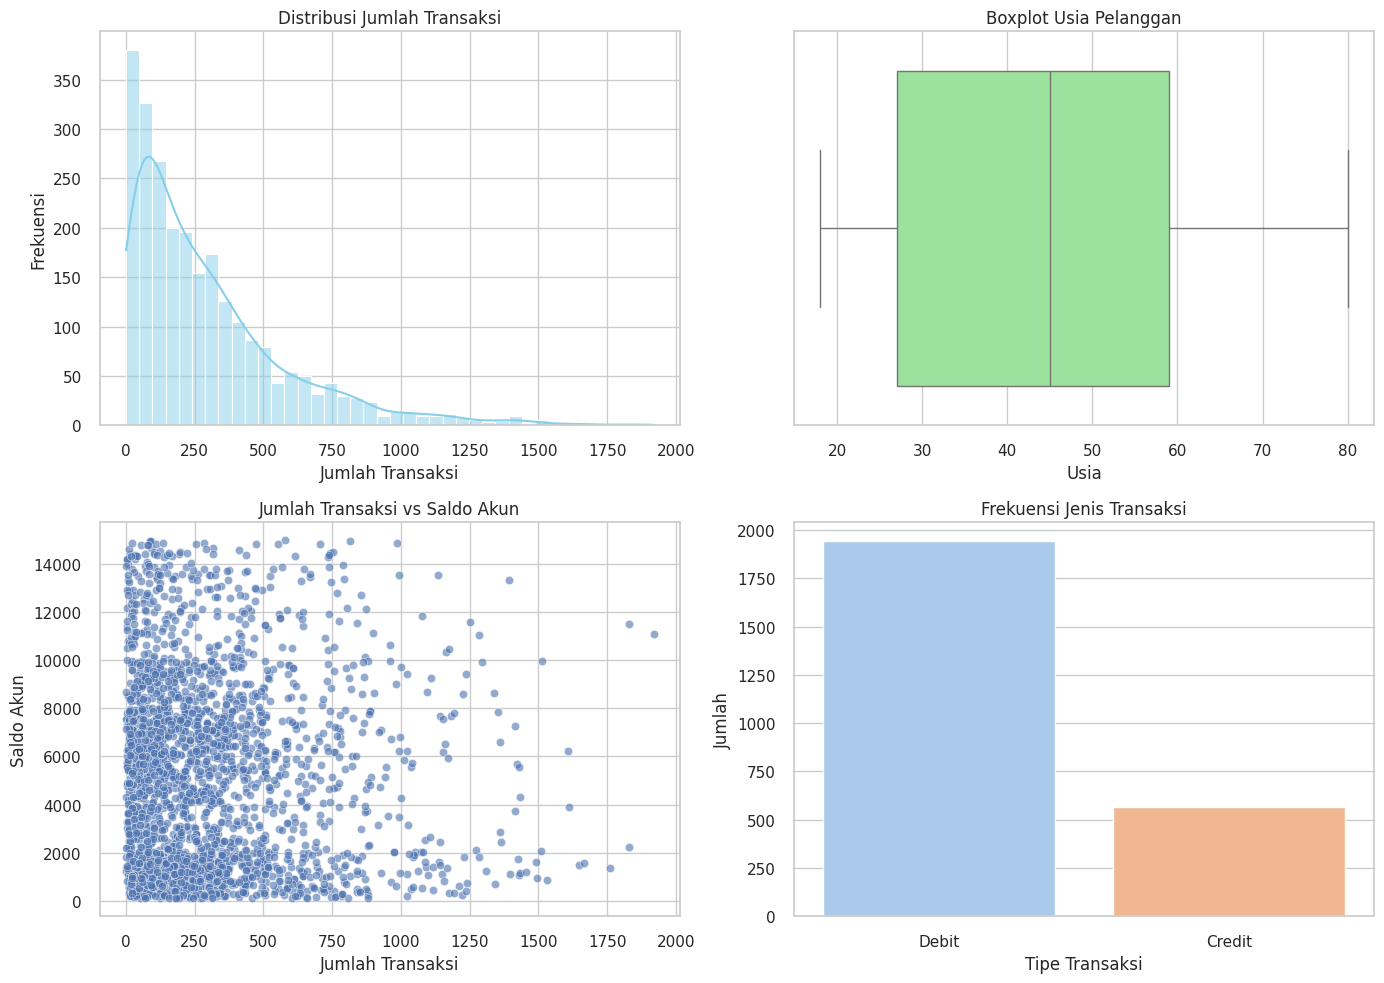

In [7]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Distribusi jumlah transaksi
sns.histplot(df['TransactionAmount'], bins=40, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribusi Jumlah Transaksi')
axes[0, 0].set_xlabel('Jumlah Transaksi')
axes[0, 0].set_ylabel('Frekuensi')

# Plot 2: Boxplot umur pelanggan
sns.boxplot(x=df['CustomerAge'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Boxplot Usia Pelanggan')
axes[0, 1].set_xlabel('Usia')

# Plot 3: Scatter plot saldo vs jumlah transaksi
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance', ax=axes[1, 0], alpha=0.6)
axes[1, 0].set_title('Jumlah Transaksi vs Saldo Akun')
axes[1, 0].set_xlabel('Jumlah Transaksi')
axes[1, 0].set_ylabel('Saldo Akun')

# Plot 4: Frekuensi tipe transaksi
sns.countplot(x='TransactionType', data=df, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Frekuensi Jenis Transaksi')
axes[1, 1].set_xlabel('Tipe Transaksi')
axes[1, 1].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [8]:
# Mengecek dataset menggunakan isnull().sum()
print("Missing values:\n", df.isnull().sum())

Missing values:
 TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [9]:
# Mengecek dataset menggunakan duplicated().sum()
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 21


In [10]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [11]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
categorical_cols = df.select_dtypes(include='object').columns
id_cols = ['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address']
encode_cols = [col for col in categorical_cols if col not in id_cols]
df = pd.get_dummies(df, columns=encode_cols, drop_first=True)

In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id
df.drop(columns=id_cols, inplace=True, errors='ignore')

# Lihat hasil akhir
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate_2023-01-02 16:01:14,TransactionDate_2023-01-02 16:01:26,TransactionDate_2023-01-02 16:06:29,TransactionDate_2023-01-02 16:07:17,TransactionDate_2023-01-02 16:22:54,...,PreviousTransactionDate_2024-11-04 08:12:14,PreviousTransactionDate_2024-11-04 08:12:15,PreviousTransactionDate_2024-11-04 08:12:16,PreviousTransactionDate_2024-11-04 08:12:17,PreviousTransactionDate_2024-11-04 08:12:18,PreviousTransactionDate_2024-11-04 08:12:19,PreviousTransactionDate_2024-11-04 08:12:20,PreviousTransactionDate_2024-11-04 08:12:21,PreviousTransactionDate_2024-11-04 08:12:22,PreviousTransactionDate_2024-11-04 08:12:23
0,0.007207,0.838710,0.244828,0.0,0.336832,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.195940,0.806452,0.451724,0.0,0.918055,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.065680,0.016129,0.158621,0.0,0.068637,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.096016,0.129032,0.051724,0.0,0.569198,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.006874,NaN,0.648276,0.0,0.492591,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [13]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    elif df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [15]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Handling outlier dengan IQR
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Terapkan untuk 'TransactionAmount' dan 'AccountBalance'
df = remove_outliers_iqr(df, 'TransactionAmount')
df = remove_outliers_iqr(df, 'AccountBalance')

In [16]:
print(df['CustomerAge'].head(10))


0    0.838710
1    0.806452
2    0.016129
3    0.129032
4    0.435484
5    0.000000
6    0.306452
7    0.790323
8    0.532258
9    0.596774
Name: CustomerAge, dtype: float64


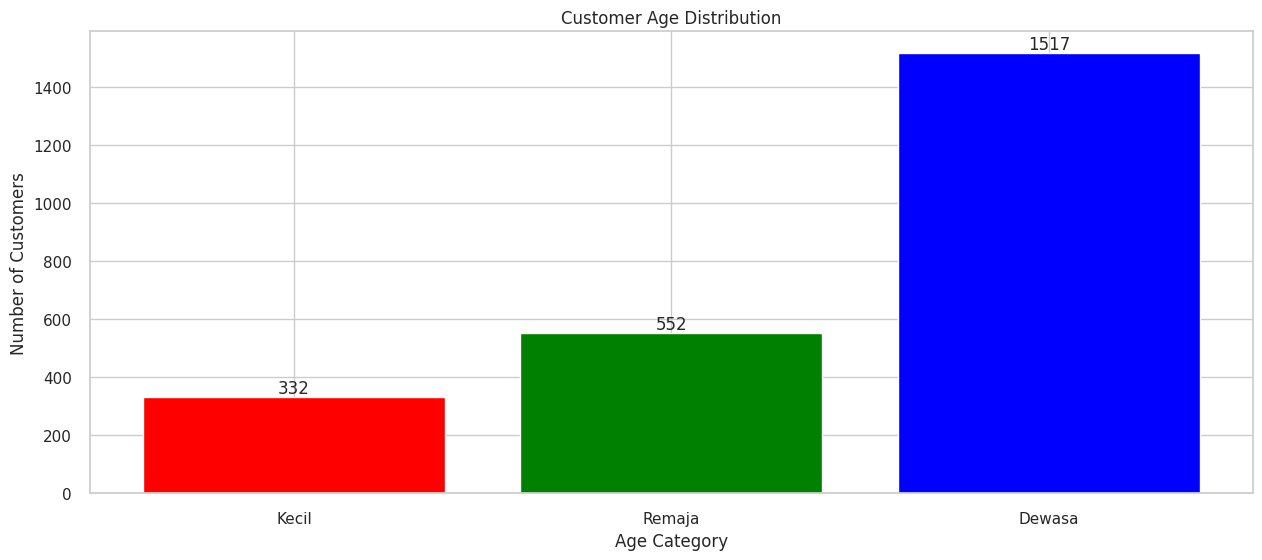

In [17]:
# Melakukan binning data berdasarkan usia pelanggan
df['CustomerAge_real'] = df['CustomerAge'] * (100 - 18) + 18

# Mengelompokkan usia ke dalam kategori: Kecil, Remaja, Dewasa
age_kecil = df['CustomerAge_real'][(df['CustomerAge_real'] >= 18) & (df['CustomerAge_real'] <= 25)]
age_remaja = df['CustomerAge_real'][(df['CustomerAge_real'] > 25) & (df['CustomerAge_real'] <= 40)]
age_dewasa = df['CustomerAge_real'][df['CustomerAge_real'] > 40]

# Menyusun data untuk plotting
x = ["Kecil", "Remaja", "Dewasa"]
y = [len(age_kecil), len(age_remaja), len(age_dewasa)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue'])
plt.title("Customer Age Distribution")
plt.xlabel("Age Category")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()



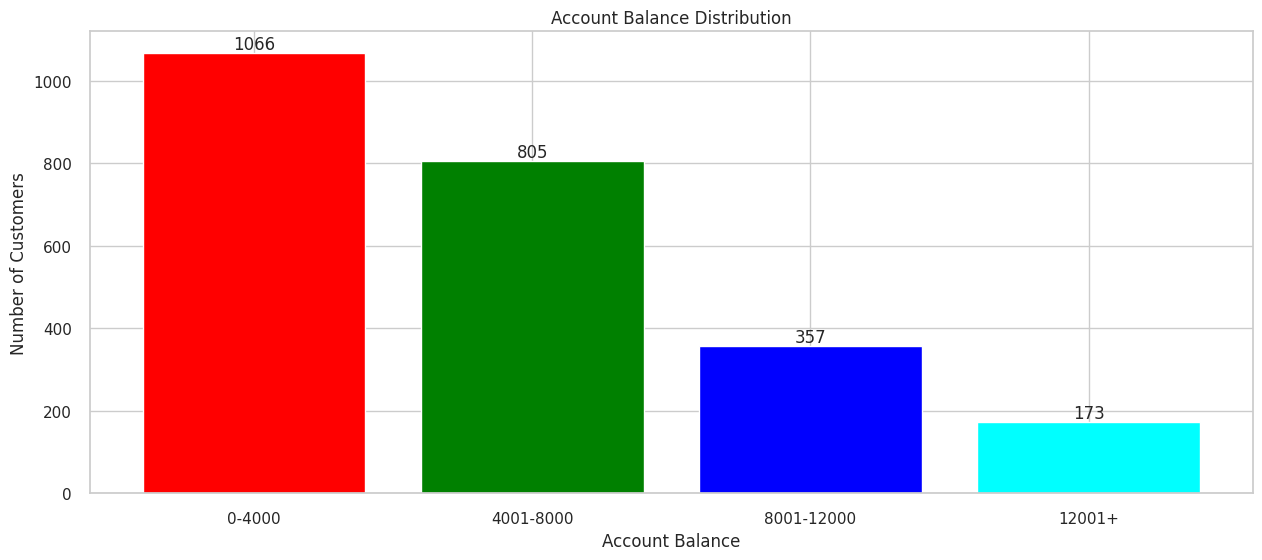

In [18]:
# Mengubah AccountBalance ke dalam rentang yang lebih mudah dipahami (mirip dengan CustomerAge_real)
df['AccountBalance_real'] = df['AccountBalance'] * (15000 - 100) + 100  # Tentukan rentang baru, misalnya 100 sampai 15,000

# Mengelompokkan saldo ke dalam kategori yang lebih realistis
balance0_4000 = df['AccountBalance_real'][(df['AccountBalance_real'] >= 100) & (df['AccountBalance_real'] <= 4000)]
balance4001_8000 = df['AccountBalance_real'][(df['AccountBalance_real'] > 4000) & (df['AccountBalance_real'] <= 8000)]
balance8001_12000 = df['AccountBalance_real'][(df['AccountBalance_real'] > 8000) & (df['AccountBalance_real'] <= 12000)]
balance12001above = df['AccountBalance_real'][df['AccountBalance_real'] > 12000]

# Menyusun data untuk plotting
x = ["0-4000", "4001-8000", "8001-12000", "12001+"]
y = [len(balance0_4000), len(balance4001_8000), len(balance8001_12000), len(balance12001above)]

# Membuat bar chart untuk distribusi AccountBalance
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan'])
plt.title("Account Balance Distribution")
plt.xlabel("Account Balance")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_real,AccountBalance_real
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,0.132555,0.430076,0.377291,0.030508,0.338435,53.266247,5142.686646
std,0.112426,0.285457,0.240561,0.148538,0.260681,23.407484,3884.142788
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,100.000000
25%,0.040993,0.145161,0.182759,0.000000,0.095959,29.903226,1529.792011
50%,0.104010,0.435484,0.351724,0.000000,0.311416,53.709677,4740.103544
75%,0.193454,0.661290,0.520690,0.000000,0.506899,72.225806,7652.790464
max,0.467223,1.000000,1.000000,1.000000,1.000000,100.000000,15000.000000


      Account Balance  Customer Age
0            0.336832      0.244828
1            0.918055      0.451724
2            0.068637      0.158621
3            0.569198      0.051724
4            0.492591      0.648276
...               ...           ...
2396         0.220590      0.468966
2397         0.112636      0.031034
2398         0.002017      0.286207
2399         0.442881      0.141379
2400         0.073593      0.255172

[2401 rows x 2 columns]


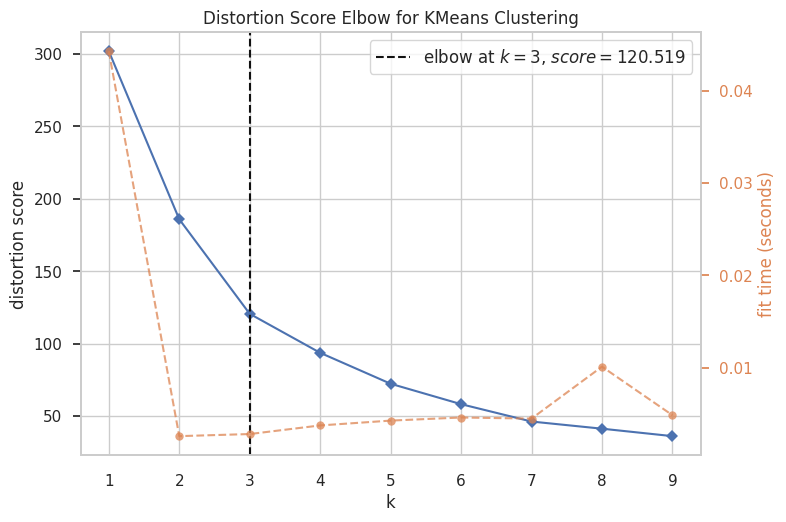

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Mengambil kolom 'AccountBalance' dan 'CustomerAge' dari dataset dan menyimpannya dalam array X
X = df.iloc[:, [4, 2]].values  # Ganti [4, 2] dengan indeks kolom yang sesuai untuk 'AccountBalance' dan 'CustomerAge'

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Account Balance', 'Customer Age']))

# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Hasil analisis metode elbow menunjukkan bahwa jumlah cluster optimal adalah 3 dengan nilai total within-cluster sum of squares (WCSS) sebesar 120.820. Ini berarti bahwa membagi data menjadi 3 cluster memberikan keseimbangan terbaik antara meminimalkan jarak di dalam cluster dan memaksimalkan jarak antar cluster.

In [21]:
# Menggunakan algoritma K-Means Clustering
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_balance = cluster_data[:, 0].mean()  # Rata-rata Account Balance
        mean_age = cluster_data[:, 1].mean()  # Rata-rata Customer Age

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Account Balance (real): {mean_balance:.2f}")
        print(f"Rata-rata Customer Age (real): {mean_age:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)


Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Account Balance (real): 0.62
Rata-rata Customer Age (real): 0.30

Cluster 2:
Rata-rata Account Balance (real): 0.15
Rata-rata Customer Age (real): 0.25

Cluster 3:
Rata-rata Account Balance (real): 0.28
Rata-rata Customer Age (real): 0.70


Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.3782


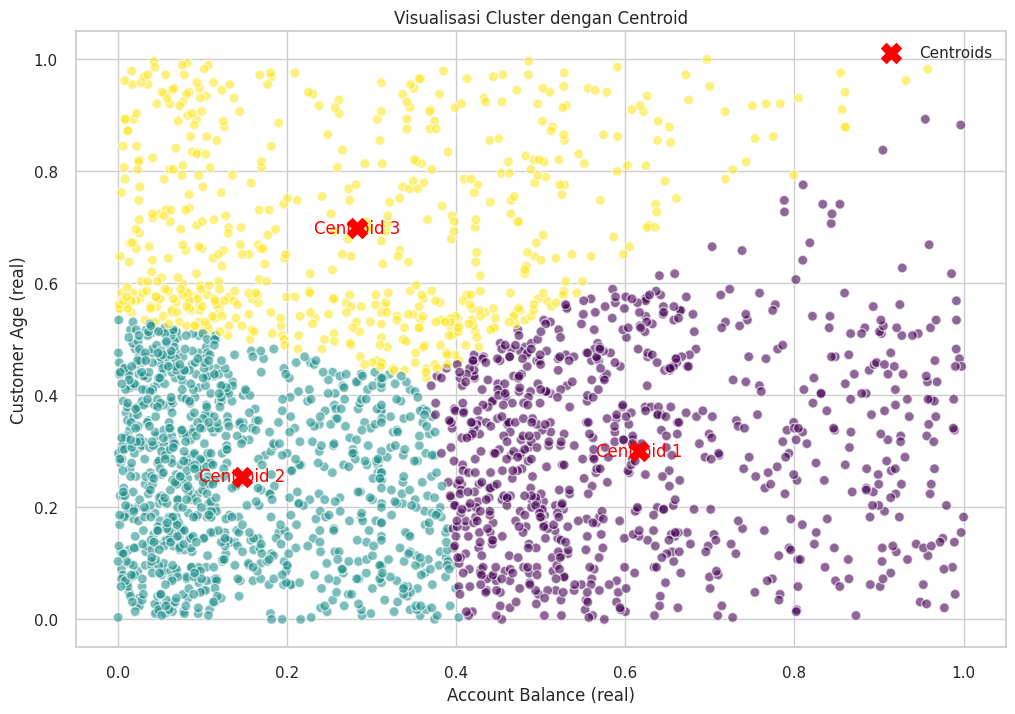

Nilai Centroids:
Centroid 1: Account Balance = 0.62, Customer Age = 0.30
Centroid 2: Account Balance = 0.15, Customer Age = 0.26
Centroid 3: Account Balance = 0.28, Customer Age = 0.70


In [24]:
# Membuat visualisasi hasil clustering
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Label centroid
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Account Balance (real)')
plt.ylabel('Customer Age (real)')
plt.legend()
plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Account Balance = {centroid[0]:.2f}, Customer Age = {centroid[1]:.2f}")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

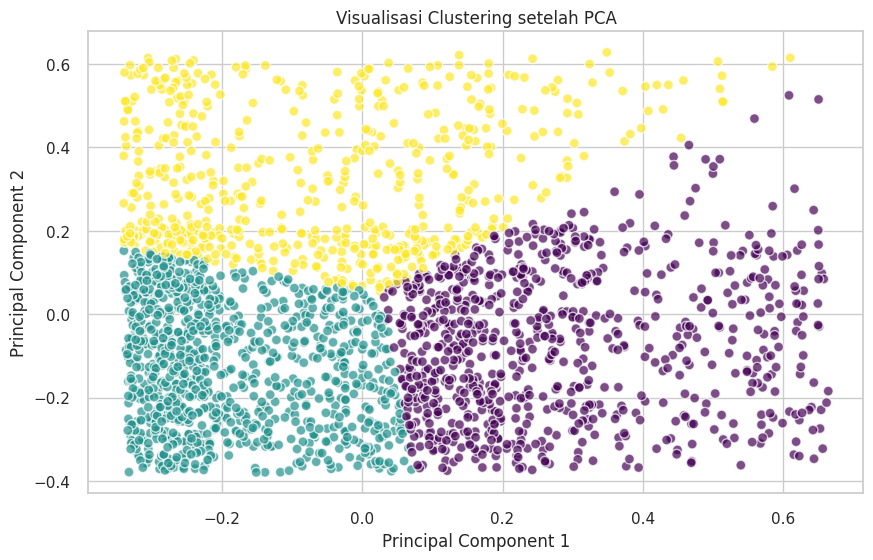

In [25]:
# Membangun model menggunakan PCA.
# Reduksi dimensi dengan PCA ke 2 komponen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi hasil PCA dengan cluster
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='w')
plt.title('Visualisasi Clustering setelah PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Menyalin DataFrame dan menambahkan hasil clustering
df_clustered = df.copy()
df_clustered['Cluster'] = labels

# ====== Statistik Numerik: mean, min, max ======
print("Statistik fitur numerik per cluster (mean, min, max):")
print(df_clustered.groupby('Cluster')[['AccountBalance', 'CustomerAge_real']].agg(['mean', 'min', 'max']))

# ====== Statistik Kategorikal: modus ======
print("\nModus fitur kategorikal per cluster:")
print(df_clustered.groupby('Cluster')[['CustomerAge']].agg(lambda x: x.mode()[0]))

# ====== Jumlah anggota tiap cluster ======
print("\nJumlah anggota tiap cluster:")
print(df_clustered['Cluster'].value_counts().sort_index())



Statistik fitur numerik per cluster (mean, min, max):
        AccountBalance                     CustomerAge_real             
                  mean       min       max             mean   min    max
Cluster                                                                 
0             0.616274  0.370255  1.000000        59.354205  18.0  100.0
1             0.146158  0.000000  0.402928        48.237927  18.0  100.0
2             0.282103  0.001478  0.957696        53.443340  18.0  100.0

Modus fitur kategorikal per cluster:
         CustomerAge
Cluster             
0           0.629032
1           0.145161
2           0.129032

Jumlah anggota tiap cluster:
Cluster
0     814
1    1006
2     581
Name: count, dtype: int64


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1. Klaster 0 didapatkan karena AccountBalance memiliki nilai rata-rata 0.616 dengan batas minimum 0.370 dan batas maksimum 1.000, dan CustomerAge_real memiliki rata-rata 59.35 tahun dengan rentang usia antara 18 hingga 100 tahun.
Variabel CustomerAge memiliki nilai modus pada kategori 0.629032, yang kemungkinan merepresentasikan kelompok usia tertentu (misalnya usia dewasa atau lansia dominan tergantung label asli). Klaster ini berisi 814 anggota.

2. Klaster 1 didapatkan karena AccountBalance memiliki nilai rata-rata 0.146 dengan batas minimum 0.000 dan batas maksimum 0.402, dan CustomerAge_real memiliki rata-rata 48.24 tahun dengan rentang usia antara 18 hingga 100 tahun. Variabel CustomerAge memiliki nilai modus pada kategori 0.145161. Klaster ini merupakan klaster dengan jumlah anggota terbanyak yaitu 1006 orang, kemungkinan berisi pengguna aktif tapi dengan saldo yang rendah.

3. Klaster 2 didapatkan karena AccountBalance memiliki nilai rata-rata 0.282 dengan batas minimum 0.001 dan batas maksimum 0.958, dan CustomerAge_real memiliki rata-rata 53.44 tahun dengan rentang usia antara 18 hingga 100 tahun. Variabel CustomerAge memiliki nilai modus pada kategori 0.129032. Klaster ini memiliki anggota paling sedikit yaitu 581, kemungkinan kelompok dengan saldo menengah dan usia menengah-tua.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Identifikasi kolom boolean yang seluruh nilainya False
false_only_cols = [col for col in df.select_dtypes(bool).columns if df[col].all() == False]

# Buang kolom-kolom tersebut dari dataframe
df_cleaned = df.drop(columns=false_only_cols)

# Tampilkan jumlah kolom sebelum dan sesudah
df.shape, df_cleaned.shape

((2401, 2898), (2401, 7))

In [29]:
#Pastikan sudah mengubah nama kolom cluster menjadi Target

df_clustered = df_cleaned.copy()
df_clustered['Target'] = labels
df_clustered.head(5)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_real,AccountBalance_real,Target
0,0.007207,0.838710,0.244828,0.0,0.336832,86.774194,5118.794709,1
1,0.195940,0.806452,0.451724,0.0,0.918055,84.129032,13779.013951,0
2,0.065680,0.016129,0.158621,0.0,0.068637,19.322581,1122.696505,1
3,0.096016,0.129032,0.051724,0.0,0.569198,28.580645,8581.049544,0
4,0.006874,0.435484,0.648276,0.0,0.492591,53.709677,7439.607669,2


In [30]:
# Simpan Data
df_clustered.to_csv('data_clustering.csv', index=False)

In [31]:
df_clustered.head(5)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_real,AccountBalance_real,Target
0,0.007207,0.838710,0.244828,0.0,0.336832,86.774194,5118.794709,1
1,0.195940,0.806452,0.451724,0.0,0.918055,84.129032,13779.013951,0
2,0.065680,0.016129,0.158621,0.0,0.068637,19.322581,1122.696505,1
3,0.096016,0.129032,0.051724,0.0,0.569198,28.580645,8581.049544,0
4,0.006874,0.435484,0.648276,0.0,0.492591,53.709677,7439.607669,2


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [35]:
# inverse dataset ke rentang normal

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler menggunakan data asli yang digunakan untuk training sebelumnya
scaler.fit(X)  # X adalah data yang sudah di-scaling sebelumnya

# Sekarang, kita dapat menginverse transform data
X_inverse = scaler.inverse_transform(X)

# Mengembalikan data yang sudah di-inverse ke dalam DataFrame
df_inverse = pd.DataFrame(X_inverse, columns=['AccountBalance', 'CustomerAge_real'])


df_inverse.head()

,AccountBalance,CustomerAge_real
0,0.336832,0.244828
1,0.918055,0.451724
2,0.068637,0.158621
3,0.569198,0.051724
4,0.492591,0.648276


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Pendapatan Tinggi dan Usia Tua))**:
  - AccountBalance: 61,627.4 (nilai asli)

  - CustomerAge_real: 59.35 tahun (nilai asli)
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi, yang memiliki saldo akun yang jauh lebih besar. Rata-rata usia mereka adalah sekitar 59 tahun, menunjukkan bahwa mereka mungkin sudah berada di usia pensiun atau mendekati pensiun, yang berarti mereka mungkin memiliki sedikit komitmen finansial yang lebih rendah dibandingkan dengan kelompok usia yang lebih muda. Produk-produk investasi yang lebih konservatif dan perencanaan pensiun jangka panjang sangat cocok untuk mereka. Mereka mungkin juga lebih cenderung untuk memilih produk yang memberikan kestabilan finansial dan risiko yang lebih rendah.

2. **Cluster 1: (Pendapatan Rendah dan Usia Muda))**:
  - AccountBalance: 14,615.8 (nilai asli)

  - CustomerAge_real: 48.24 tahun (nilai asli)
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan yang lebih rendah, tetapi rata-rata usia mereka berada di kisaran 48 tahun, yang bisa dianggap masih dalam tahap pengembangan karier. Dengan pendapatan yang lebih rendah, mereka mungkin lebih fokus pada stabilitas finansial dan mengelola utang. Mereka mungkin lebih cenderung mencari produk keuangan yang terjangkau, seperti pinjaman dengan bunga rendah atau program tabungan untuk jangka panjang. Pelanggan dalam kelompok ini mungkin belum memiliki penghasilan maksimal, tetapi mereka mencari cara untuk menambah kesejahteraan finansial.

3. **Cluster 2: (Pendapatan Menengah dan Usia Lebih Muda))**:
  - AccountBalance: 28,210.3 (nilai asli)

  - CustomerAge_real: 53.44 tahun (nilai asli)
- **Analisis:** Cluster ini berisi pelanggan dengan pendapatan menengah, yang mungkin memiliki pendapatan yang cukup stabil. Rata-rata usia mereka adalah 53 tahun, yang menunjukkan bahwa mereka mungkin sudah mencapai puncak karier mereka dan mulai mengumpulkan kekayaan. Pendapatan yang lebih menengah memberikan mereka peluang untuk berinvestasi dalam produk-produk seperti tabungan pensiun atau investasi dengan pengelolaan yang cukup aman. Mereka cenderung mencari solusi untuk mencapai stabilitas finansial jangka panjang.



(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Menambahkan kolom Target yang berisi label cluster
df_inverse['Target'] = labels

# Gabungkan df_inverse ke df_clustered berdasarkan index
df_clustered[['AccountBalance', 'CustomerAge_real', 'Target']] = df_inverse




In [34]:
# Simpan kembali ke CSV
df_clustered.to_csv('data_clustering_inverse.csv', index=False)